Map Contour

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
map1= cv2.imread("map.png")
gray= cv2.cvtColor(map1, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
thr, mask  = cv2.threshold(gray, 50,255,cv2.THRESH_BINARY_INV)
cv2.imshow("mask", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cntr, _ = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
len(cntr)
cv2.drawContours(map1, cntr, -1,(0,255,0), 3)
cv2.imshow("map1", map1)
cv2.waitKey(0)
cv2.destroyAllWindows()

Document Scanner

Detect the biggest contour in an image (a page) and perform perspective transform.

In [ ]:
doc= cv2.imread("Document1.png")
gray = cv2.cvtColor(doc, cv2.COLOR_BGR2GRAY)
thr, mask = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)
cv2.imshow("mask", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
area = []
contours, _ = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
if len(contours) > 0:
    # find the biggest countour (c) by the area
    c = max(contours, key = cv2.contourArea)
    cv2.drawContours(doc, c, -1,(0,255,0),2)

    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(doc,(x,y),(x+w,y+h),(255,255,0),2)


# cv2.drawContours(doc, maxareac, -1,(255,0,0), 3)
plt.imshow(doc)
cv2.imshow("doc", doc)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# plt.imshow(doc, cmap="gray")
doc1 = doc.copy()
# ptinp = np.array([[10, ]])
# ptop

cv2.line(doc1,[30,230],[570,145],[0,255,0],3) # top left and right
cv2.line(doc1,[140,980],[725,860],[0,255,0],3) # top left and right

src= np.array([[30,230],[570,145],[140,980],[725,860]],dtype=np.float32)
dst = np.array([[0,0], [300,0],[0,300],[300,300]],dtype=np.float32)

pt = cv2.getPerspectiveTransform( src.astype(np.float32),dst.astype(np.float32))
wrapped = cv2.warpPerspective(doc, pt, (300,300))

In [ ]:
plt.subplot(1,2,1)
plt.imshow(doc1)
plt.subplot(1,2,2)
plt.imshow(wrapped)


License Plate Detection

Detect rectangular contour of the plate from car images.

Prepares you for text extraction (OCR).

In [30]:
car = cv2.imread("car_licenceplate.png")
gray = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
cv2.namedWindow("car GRAY")
cv2.imshow("car GRAY", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
thr, mask1 = cv2.threshold(gray,90,255, cv2.THRESH_BINARY)
# mask1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            #    cv2.THRESH_BINARY_INV, 11, 2)
cv2.namedWindow("car mask")
cv2.imshow("car mask", mask1)
cv2.waitKey(0)
cv2.destroyAllWindows()

Only 2 contours was detected, where 1 contour has 45 points and the other had just 1 point (cant draw contour if <2 points)
entire image was made into a single contour with 45 points. 

To diffrentiate Morphological operation erosion used

In [32]:
mask  = cv2.morphologyEx(mask1, cv2.MORPH_ERODE, kernel=np.ones((3,3),np.uint8))

In [33]:
cv2.namedWindow("car mask")
cv2.imshow("car mask", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
edge1 = cv2.Canny(mask1,100,200)
cv2.namedWindow("car edge")
cv2.imshow("car edge", edge1)
cv2.waitKey(0)
cv2.destroyAllWindows()

452


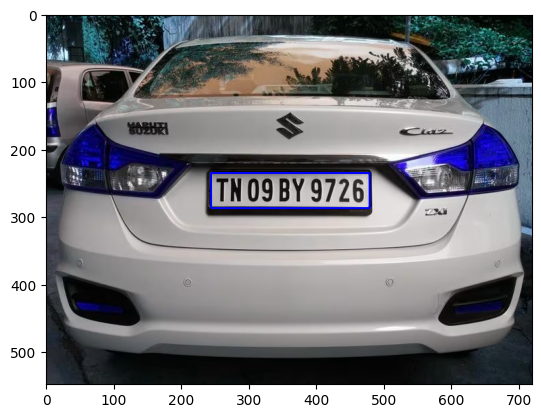

In [37]:
contours, hirearchy = cv2.findContours(mask1, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# cv2.drawContours(car,contours, -1,(0,255,255),2)
# cv2.namedWindow("car contour")

# cv2.imshow("car contour", car)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

print(len(contours))
if len(contours)>0:
    for i,contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if len(contour)>2:
            approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)         
            if len(approx)==4:
                if area > 1000:                   
                    x, y, w, h = cv2.boundingRect(contour)
                    ar = w / float(h)
                    # print("w/h: ",ar)
                    if ar == 1:
                        shape = "Square"
                    else:
                        shape = "Rectangle"
                    cv2.rectangle(car,
                        (x,y),
                        (x+w,y+h),
                        (0,0,255), 2)
cv2.namedWindow("car")
cv2.imshow("car", car)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(car)